# Ross Mcmorrow-S00002161 | DAV |  Assigment 2 

In [1]:
# import all required Libraries
import pandas as pd
import numpy as np
import csv
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
%matplotlib notebook

In [2]:
# turn csv in df
mydf= pd.read_csv('time_series_19-covid-Confirmed_archived_0325.csv', delimiter=',')
mydf.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [3]:
# function to get required data for plotting and change date format.
def GetCountry(CountryRegion):
    countryDF = mydf.loc[mydf['Country/Region'] == CountryRegion]
    dates = list(countryDF.columns[4:].values)
    y = list(countryDF.values[0][4:])
    newdateF = []
    for i in dates:
        x = datetime.datetime.strptime(i, '%x')
        n = (datetime.date.strftime(x, "%d/%b"))
        newdateF.append(n)
    newdf = pd.DataFrame(y, newdateF)
    newdf = newdf.rename(columns={0:'Cases'})
    return newdf

In [4]:
# function to animate the data 
def animate(i):
    sns.set()
    data = Country.iloc[:int(i+1)] 
    p = sns.lineplot(x=data.index, y=data['Cases'], data=data, color="b")
    plt.xticks(rotation=310)
    plt.xticks(np.arange(1,samples,2))
    plt.tick_params(labelsize=12)
   

In [5]:
# Choose Country to investigate, this works for any country in the ‘Country/Region’ column of the DF.
# For this assignment India is the Country of investigation.

TestArea = 'India'
Country = GetCountry(TestArea)
Country.head()

,Cases
22/Jan,0.0
23/Jan,0.0
24/Jan,0.0
25/Jan,0.0
26/Jan,0.0


In [6]:
# used writer method for animation 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=3500)

<IPython.core.display.Javascript object>


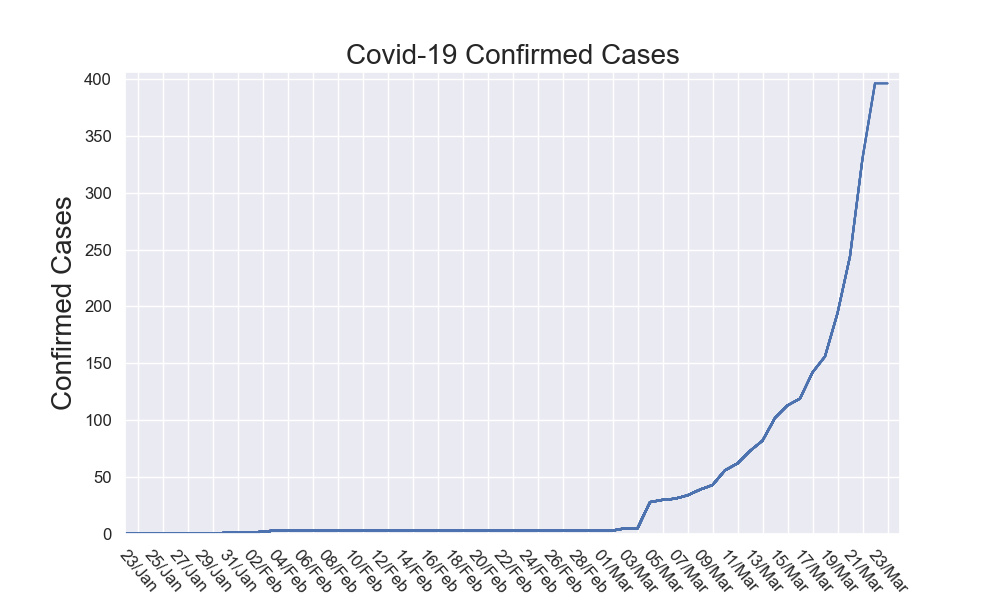

Text(0.5, 1.0, 'Covid-19 Confirmed Cases')

In [7]:
# Set up the plot figure for animation
%matplotlib notebook
sns.set()
samples = len(Country)
fig = plt.figure(figsize=(10,6))
plt.xlim(0, samples)
plt.ylim(np.min(Country)[0], np.max(Country)[0]+10)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Confirmed Cases',fontsize=20)
plt.title('Covid-19 Confirmed Cases',fontsize=20)
   

In [8]:
# Call the animation 
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=samples, repeat=True, blit=True)

In [9]:
# Save the animation with the name tag of the chosen country of investigation
ani.save('{}.mp4'.format(TestArea) , writer=writer)

In [10]:
# Display the animation
Video('{}.mp4'.format(TestArea) )

## Conclusion

From this assignment, I have learned how to create animations using the Matplotlib Animation library. I have found the library to be very good but a bit unreliable. A Jupyter notebook with an animation in it may give different results when run from different computers. This could be because of different Anaconda and Python library versions installed on the computers.

An alternative option to the Matplotlib Animation library could be the Python OpenCV library. Matplotlip could be used in an animation loop to save the plots(frames) into a folder and then OpenCV could be used to merge the plots into an MP4.  

However, the Matplotlib Animation library has extra functionality and optimisations build into it. When the Matplotlib Animation library makes an animation, each frame is a copy of the last with only some pixels changed. This implementation would require less processing power than the OpenCV method suggested above. 

